## Car Price Predictor

In [959]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score

In [960]:
df=pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [961]:
backup=df.copy()

In [962]:
df=df[df['year'].str.isnumeric()]

In [963]:
df['year']=df['year'].astype(int)

In [964]:
df=df[df['Price']!='Ask For Price']

In [965]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [966]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)

In [967]:
df=df[~df['fuel_type'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [968]:
df['name']=df['name'].str.split().str.slice(0,3).str.join(' ')
df=df.reset_index(drop=True)

In [969]:
## Cleaned Data
df
df.to_csv('Cleaned_car_data.csv',index=False)

In [970]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


## Removing The Outlier


In [971]:
df=df[df['Price']<6000000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


c:\Users\Al hamad\OneDrive\Desktop\Flask\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al hamad\OneDrive\Desktop\Flask\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al hamad\OneDrive\Desktop\Flask\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al hamad\OneDrive\Desktop\Flask\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al hamad

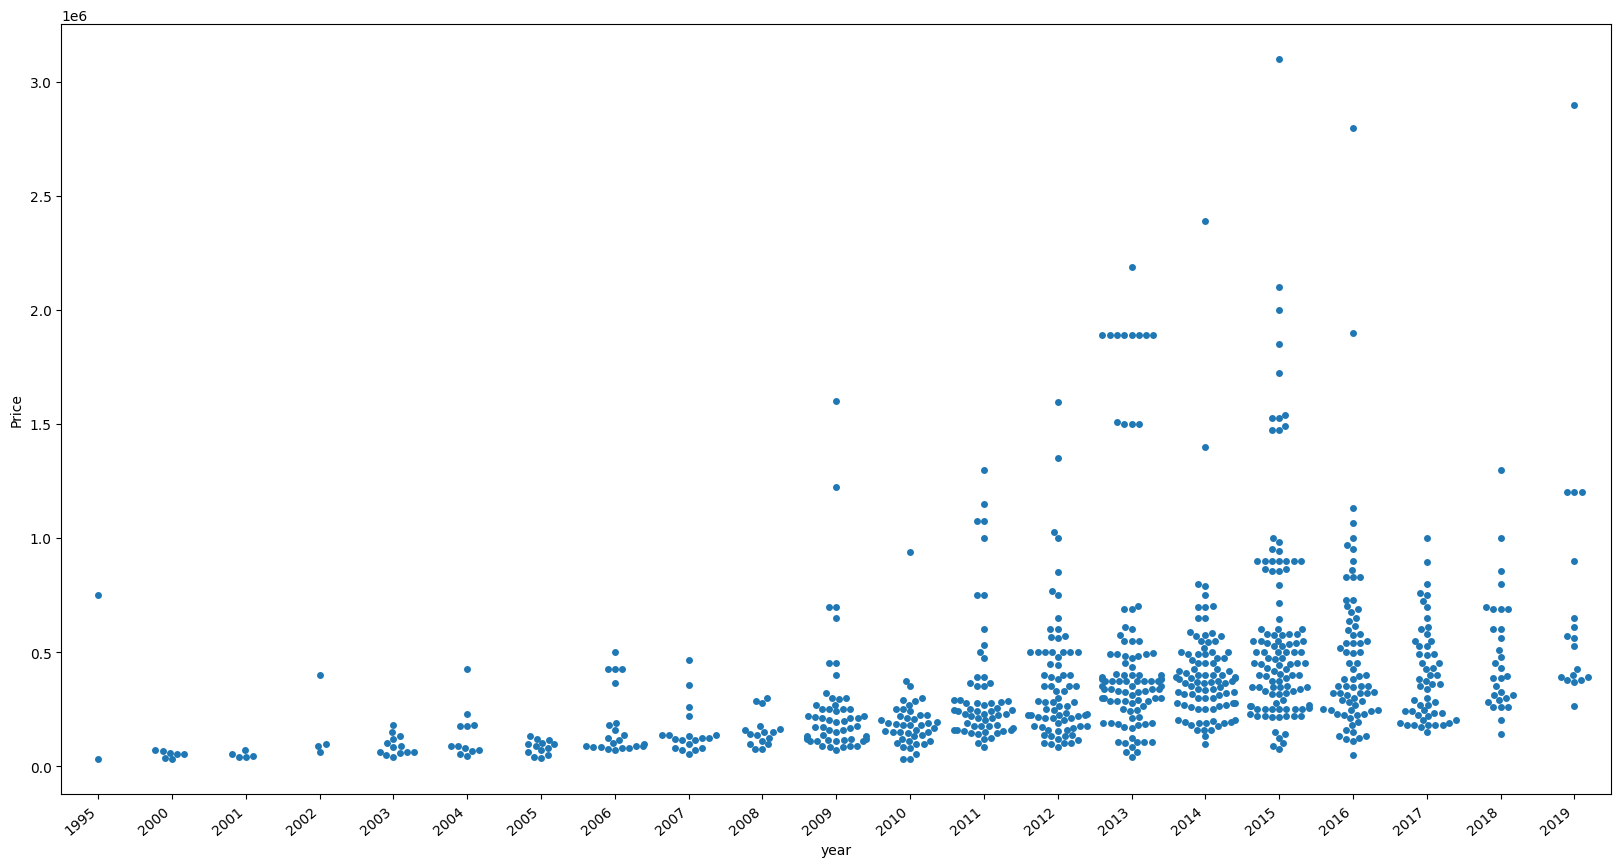

In [972]:
## Relationship with Year
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


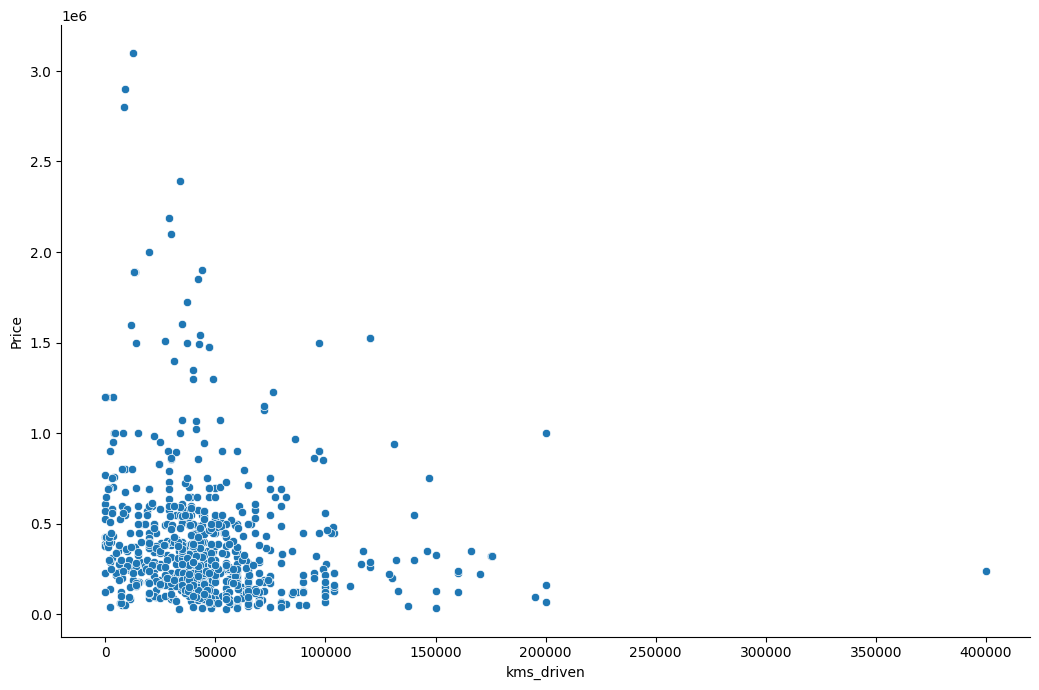

In [973]:
## Checkin relationship with km_driven
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

In [974]:
## Extracting The Data
x=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']

In [975]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])


,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [976]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [977]:
model=LinearRegression()
pipe = make_pipeline(column_trans, model)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

In [978]:
r2_score(y_test,y_pred)

0.6788862217883653

## Improving Accuracy at Best State

In [979]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    model=LinearRegression()
    pipe=make_pipeline(column_trans,model)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [980]:
np.argmax(scores)

np.int64(302)

In [981]:
scores[np.argmax(scores)]

0.8991157554877304

In [982]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430301.37134528])

In [983]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
model=LinearRegression()
pipe=make_pipeline(column_trans,model)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [984]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [985]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([456670.3272301])

In [986]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese